In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [0]:
!curl http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv > Advertising.csv
!curl http://faculty.marshall.usc.edu/gareth-james/ISL/Credit.csv > Credit.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4756  100  4756    0     0  12385      0 --:--:-- --:--:-- --:--:-- 12385
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22368  100 22368    0     0  71463      0 --:--:-- --:--:-- --:--:-- 71235


In [0]:
advertising = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])
advertising.info()

credit = pd.read_csv('Credit.csv', usecols=list(range(1,12)))
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


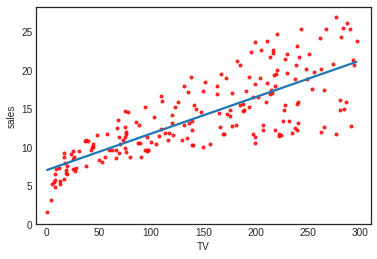

In [0]:
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

In [0]:
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


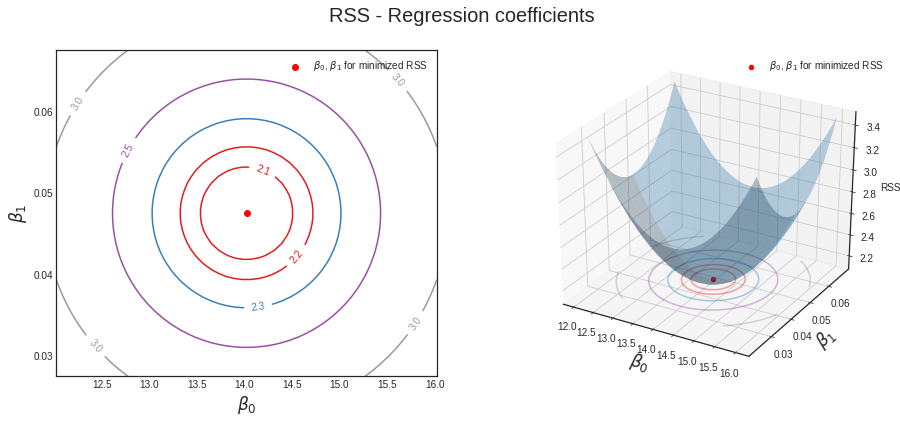

In [0]:
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

In [0]:
est = smf.ols('sales ~ TV', advertising).fit()
est.summary().tables[1]
# RSS with regression coefficients
((advertising.sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.102530583131351

In [0]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127695
[0.04753664]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [   1    1   16   29   51   93  168  311  277  289  293  343  561 1196
 2069]


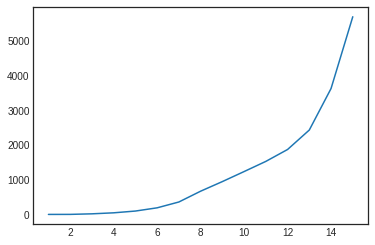

In [49]:
cases = np.array([2069,1196,561,343,293,289,277,311,168,93,51,29,16,1,1])
cases = cases[::-1]

cases_truth = np.array([2704,1610,1815,1704,2069,1196,561,343,293,289,277,311,168,93,51,29,16,1,1])
cases_truth = cases_truth[::-1]


days_truth = np.arange(1,len(cases_truth)+1)


days = np.arange(1,len(cases)+1)
print (days,cases)

totals = np.cumsum(cases)
totals_truth = np.cumsum(cases_truth)


plt.plot(days, totals)

$$
y = \beta_0 + \beta_1 t
$$

[-1265.24761905   314.23928571]


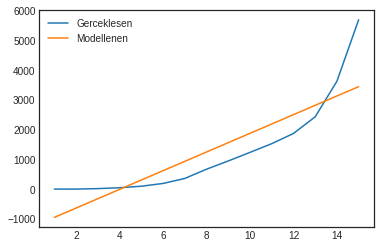

In [50]:
X = np.vstack(
    (np.ones(len(days)),
     days
     )
).T


A = np.dot(X.T, X)
b = np.dot(X.T,totals)
A_inv = np.linalg.inv(A)

betas_linear = np.dot(A_inv,b)

print (betas_linear)

totals_linear = np.dot(X,betas_linear)

plt.plot(days,totals, label='Gerceklesen')
plt.plot(days,totals_linear,label='Modellenen')
plt.legend()

[ 646.58021978 -360.52348093   42.17267292]


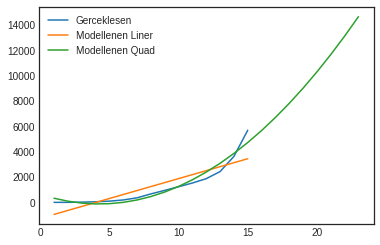

In [51]:
X = np.vstack(
    (np.ones(len(days)),
     days,
     days**2
     )
).T


A = np.dot(X.T, X)
b = np.dot(X.T,totals)
A_inv = np.linalg.inv(A)

betas_quad = np.dot(A_inv,b)

print (betas_quad)

totals_quad = np.dot(X,betas_quad)

days_adv = np.arange(1,24)
X_adv = np.vstack(
    (np.ones(len(days_adv)),
     days_adv,
     days_adv**2
     )
).T

totals_quad_adv = np.dot(X_adv,betas_quad)

plt.plot(days,totals, label='Gerceklesen')
plt.plot(days,totals_linear,label='Modellenen Liner')
plt.plot(days_adv,totals_quad_adv,label='Modellenen Quad')
plt.legend()

[-485.88644689  373.17428595  -68.85347088    4.62608932]


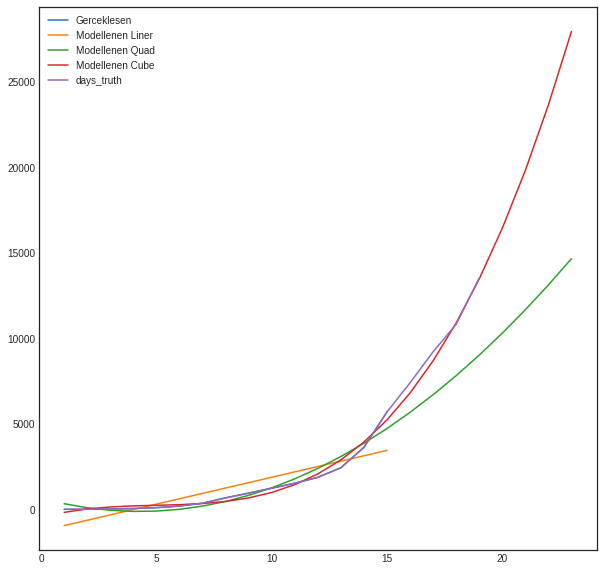

In [52]:
X = np.vstack(
    (np.ones(len(days)),
     days,
     days**2,
     days**3
     )
).T


A = np.dot(X.T, X)
b = np.dot(X.T,totals)
A_inv = np.linalg.inv(A)

betas_cube = np.dot(A_inv,b)

print (betas_cube)

totals_cube = np.dot(X,betas_cube)

days_adv = np.arange(1,24)
X_adv = np.vstack(
    (np.ones(len(days_adv)),
     days_adv,
     days_adv**2,
     days_adv**3
     )
).T

totals_cube_adv = np.dot(X_adv,betas_cube)
plt.figure(figsize=(10,10))
plt.plot(days,totals, label='Gerceklesen')
plt.plot(days,totals_linear,label='Modellenen Liner')
plt.plot(days_adv,totals_quad_adv,label='Modellenen Quad')
plt.plot(days_adv,totals_cube_adv,label='Modellenen Cube')
plt.plot(days_truth,totals_truth,label='days_truth')
plt.legend()

[ 1.46704987e+02 -3.04367401e+02  2.15498901e+02 -7.22569275e+01
  1.40057869e+01 -1.85941792e+00  2.04479575e-01 -1.66478194e-02
  7.71054765e-04 -1.43690631e-05]


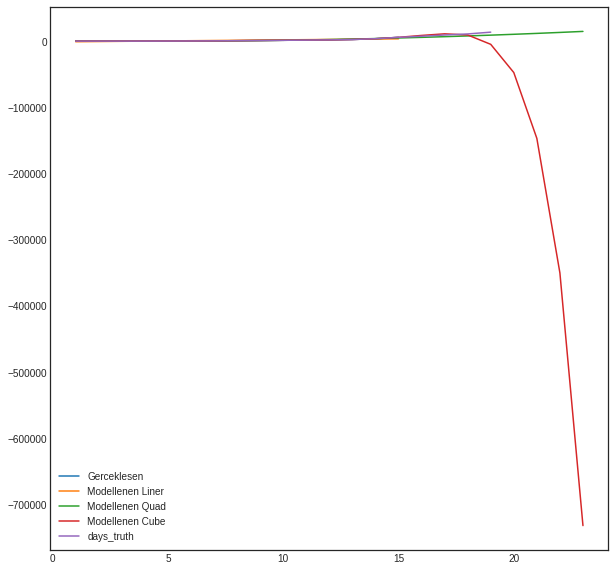

In [55]:
X = np.vstack(
    (np.ones(len(days)),
     days,
     days**2,
     days**3,
     days**4,
     days**5,
     days**6,
     days**7,
     days**8,
     days**9     
     )
).T


A = np.dot(X.T, X)
b = np.dot(X.T,totals)
A_inv = np.linalg.inv(A)

betas_cube = np.dot(A_inv,b)

print (betas_cube)

totals_cube = np.dot(X,betas_cube)

days_adv = np.arange(1,24)
X_adv = np.vstack(
    (np.ones(len(days_adv)),
     days_adv,
     days_adv**2,
     days_adv**3,
     days_adv**4,
     days_adv**5,
     days_adv**6,
     days_adv**7,
     days_adv**8,
     days_adv**9
     )
).T

totals_cube_adv = np.dot(X_adv,betas_cube)
plt.figure(figsize=(10,10))
plt.plot(days,totals, label='Gerceklesen')
plt.plot(days,totals_linear,label='Modellenen Liner')
plt.plot(days_adv,totals_quad_adv,label='Modellenen Quad')
plt.plot(days_adv,totals_cube_adv,label='Modellenen 10th')
plt.plot(days_truth,totals_truth,label='days_truth')
plt.legend()

$$
y = e^{\beta_0 + \beta_1t}
$$


$$
ln(y) = \beta_0 + \beta_1 t
$$

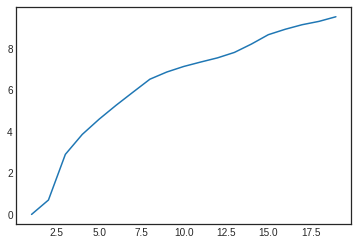

In [54]:
y = np.log(totals_truth)
plt.plot(days_truth, y)